In [11]:
import neuralynx as nlx
import pandas as pd
import numpy as np

# Compare aIED Sample and NCS data

The aIED detector is not working with the data that I'm loading in from NCS and I don't know why. In this notebook I'm going to check it out by comparing the inputs.

Start by loading the data from both sources

In [7]:
source = 'data/labeled_ied_macros/eeg/P37CS_032515/macros/CSC89.ncs'
ncs_eeg, ncs_headers = nlx.load_ncs_for_sorting(source)
ncs_start_time = ncs_eeg.index.values[0]
ncs_samp_rate = int(float(ncs_headers["SamplingFrequency"]))
ncs_eeg.head()

Time stamp difference tolerance exceeded


1.427299e+15   -1.831111
1.427299e+15   -0.305185
1.427299e+15   -0.610370
1.427299e+15   -0.305185
1.427299e+15    0.610370
dtype: float64

In [16]:
sample_source = 'sample_eegdata.csv'
sample_eeg = np.genfromtxt(sample_source, delimiter=',', autostrip=True)
sample_eeg = pd.DataFrame(sample_eeg.T)

In [20]:
sample_eeg.groupby(level=0, axis=1).describe()

count      mean        std    min   25%  50%   75%    max
0   396000.0 -0.000212  15.436846 -325.2  -9.5 -0.2   9.3  187.0
1   396000.0  0.002379  25.592291 -346.1 -15.7 -0.3  15.6  508.7
2   396000.0  0.001289  28.317102 -289.5 -15.4  0.1  15.5  324.0
3   396000.0  0.002240  50.608882 -532.3 -14.9  1.9  18.8  622.9
4   396000.0  0.002321  26.500644 -314.1 -14.9  0.3  15.2  392.9
5   396000.0  0.000002  21.730031 -272.7 -12.4 -0.1  12.3  251.0
6   396000.0  0.000822  17.518704 -197.2 -10.9  0.0  10.9  167.6
7   396000.0 -0.001023  16.600606 -191.7 -10.1  0.2  10.4  172.3
8   396000.0 -0.000351  16.707210 -152.5  -9.9  0.4  10.6  114.2
9   396000.0 -0.000618  17.294118 -134.0 -10.1  0.5  11.0   98.5
10  396000.0 -0.000220  17.840147 -116.0 -10.5  0.6  11.4   87.7
11  396000.0  0.000980  20.904030 -119.2 -12.7  0.8  13.6  111.4

In [21]:
ncs_eeg.describe()

count    4.069888e+06
mean    -3.170428e-01
std      3.739534e+01
min     -2.237007e+02
25%     -2.288888e+01
50%      0.000000e+00
75%      2.227851e+01
max      3.305155e+02
dtype: float64

1.6674181138080097

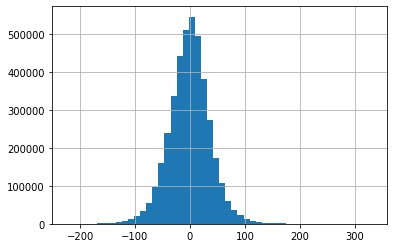

In [27]:
ncs_eeg.hist(bins=50)
import scipy.stats
scipy.stats.kurtosis(ncs_eeg)

array([ 1.69618113, -0.36980973, -0.44172854, ..., -0.84087625,
       -0.62157015, -0.26739454])

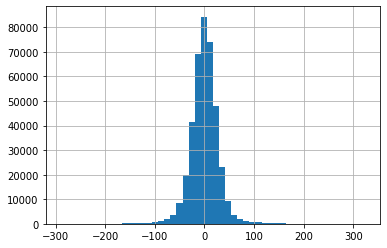

In [34]:
sample_eeg.iloc[:,2].hist(bins=50)
scipy.stats.kurtosis(sample_eeg, axis=1)

<AxesSubplot:>

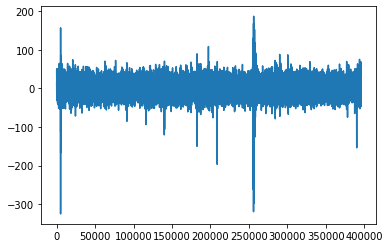

In [36]:
sample_eeg.iloc[:,0].plot()

<AxesSubplot:>

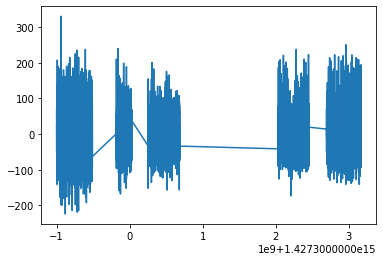

In [37]:
ncs_eeg.plot()

In [40]:
np.unique(np.diff(ncs_eeg.index))

array([4.99000000e+02, 5.00000000e+02, 2.89449900e+06, 2.15487413e+08,
       2.41308403e+08, 3.25834369e+08, 1.34684696e+09])

Hmmm that's problematic: There are gaps in this NCS data. Which means that my resampling is broken.